<a href="https://colab.research.google.com/github/faizankshaikh/Data-Science-Hacks/blob/master/CustomDataGen_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a Custom Image DataGenerator in Keras
### Use case 1 - Multiple Input heads

Suppose your neural net has multiple input heads, 

![temp](../Data/muti_input_nn.png)

and you want that the data generator should be able to handle the data preparation on the fly, you can create a wrapper around ImageDataGenerator class to give the required output


In [1]:
## %tensorflow_version 1.x  ####uncomment this code to run on Colab
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10, mnist
from keras.preprocessing.image import ImageDataGenerator

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
(X_train, y_train), (_, _) = cifar10.load_data()

X1_train = X_train[:100]
X2_train = X_train[100:200]
y_train = y_train[:100]

def CustomImageDataGenerator(X_list, y, batch_size):
    # bring data in range(0, 1)
    generator = ImageDataGenerator(rescale=1 / 255.0)

    [X1, X2] = X_list

    # define data generators
    datagen1 = generator.flow(X1, y, batch_size=batch_size)
    datagen2 = generator.flow(X2, y, batch_size=batch_size)

    while True:
        X1_proc, y = datagen1.__next__()
        X2_proc, _ = datagen2.__next__()
        yield [X1_proc, X2_proc], y

In [ ]:
for [X1_batch, X2_batch], y_batch in CustomImageDataGenerator([X1_train, X2_train], y_train, batch_size=1):
    break

In [4]:
X1_batch.shape

(1, 32, 32, 3)

In [5]:
X2_batch.shape

(1, 32, 32, 3)

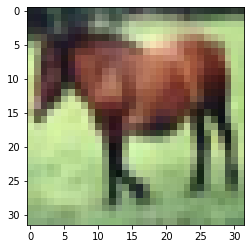

In [6]:
plt.imshow(X1_batch[0])

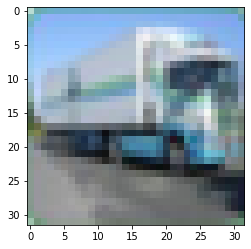

In [7]:
plt.imshow(X2_batch[0])